In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve
from xgboost import XGBClassifier

In [26]:
file_path = 'C:/Users/Sasha/ML_labs/diabetes.csv' 

df = pd.read_csv(file_path)
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std    

In [28]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Accuracy: 0.7207792207792207
Precision: 0.6071428571428571
Recall: 0.6181818181818182
F1 Score: 0.6126126126126126


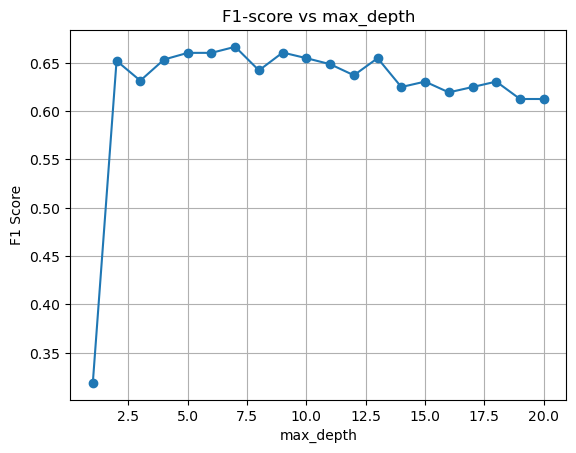

In [32]:
depths = range(1, 21)
f1_scores = []

for d in depths:
    model = RandomForestClassifier(max_depth=d, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    f1_scores.append(f1_score(y_test, y_pred))

plt.plot(depths, f1_scores, marker='o')
plt.title('F1-score vs max_depth')
plt.xlabel('max_depth')
plt.ylabel('F1 Score')
plt.grid(True)
plt.show()

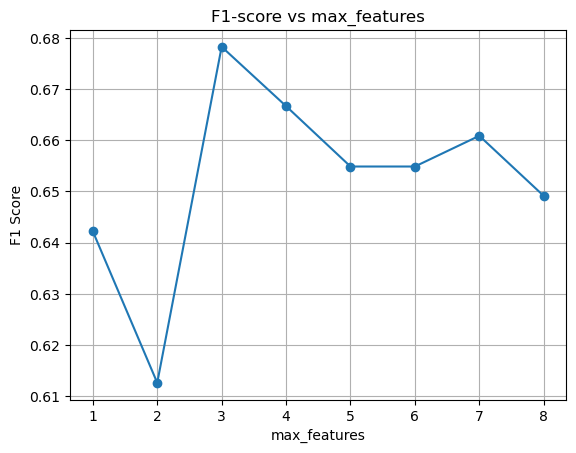

In [33]:
features = range(1, X.shape[1] + 1)
f1_scores_feat = []

for f in features:
    model = RandomForestClassifier(max_features=f, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    f1_scores_feat.append(f1_score(y_test, y_pred))

plt.plot(features, f1_scores_feat, marker='o')
plt.title('F1-score vs max_features')
plt.xlabel('max_features')
plt.ylabel('F1 Score')
plt.grid(True)
plt.show()

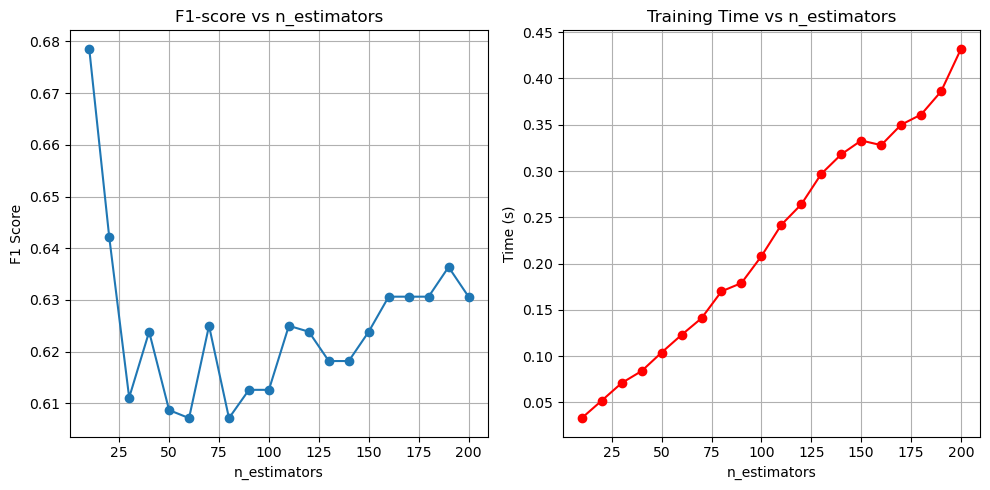

In [34]:
from time import time

n_estimators = range(10, 201, 10)
f1_scores_tree = []
times = []

for n in n_estimators:
    model = RandomForestClassifier(n_estimators=n, random_state=42)
    start = time()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    end = time()
    f1_scores_tree.append(f1_score(y_test, y_pred))
    times.append(end - start)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(n_estimators, f1_scores_tree, marker='o')
plt.title('F1-score vs n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('F1 Score')
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(n_estimators, times, marker='o', color='red')
plt.title('Training Time vs n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('Time (s)')
plt.grid(True)

plt.tight_layout()
plt.show()

In [42]:
xgb = XGBClassifier(n_estimators=100, max_depth=3, learning_rate=0.1, subsample=0.8,  eval_metric='logloss')

start = time()
xgb.fit(X_train, y_train)
train_time = time() - start

xgb_pred = xgb.predict(X_test)

print("=== XGBoost ===")
print("Training Time:", train_time)
print("Accuracy:", accuracy_score(y_test, xgb_pred))
print("Precision:", precision_score(y_test, xgb_pred))
print("Recall:", recall_score(y_test, xgb_pred))
print("F1 Score:", f1_score(y_test, xgb_pred))

=== XGBoost ===
Training Time: 0.0789942741394043
Accuracy: 0.7532467532467533
Precision: 0.6440677966101694
Recall: 0.6909090909090909
F1 Score: 0.6666666666666665


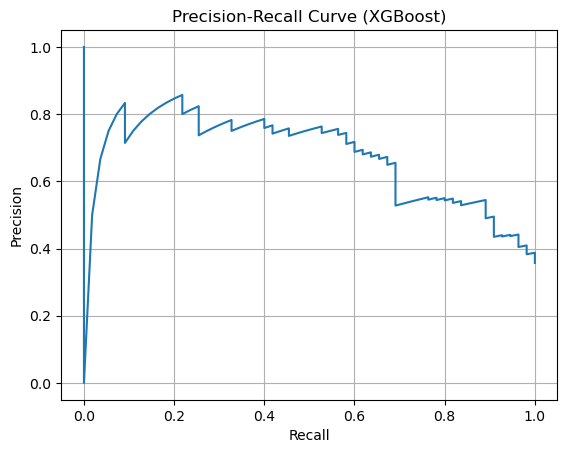

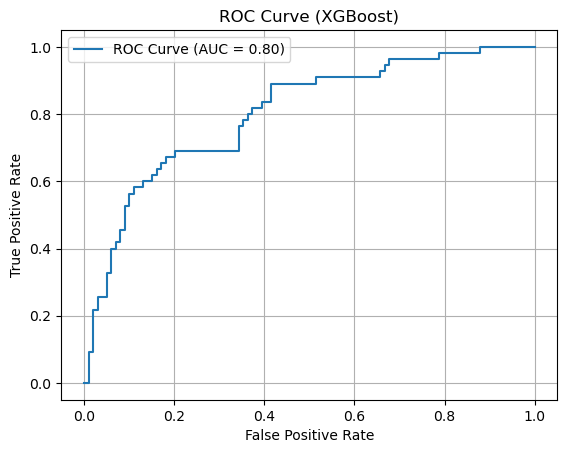

In [36]:
y_proba = xgb.predict_proba(X_test)[:, 1]

prec, rec, _ = precision_recall_curve(y_test, y_proba)
fpr, tpr, _ = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)

plt.figure()
plt.plot(rec, prec, label='PR Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (XGBoost)')
plt.grid(True)
plt.show()

plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (XGBoost)')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
## Вывод: XGBoost показывает лучшую точность, но требует более внимательного подбора параметров и может дольше обучаться.
## Случайный лес, в свою очередь, хорошо работает «из коробки» и прост в анализе.